# AIT500 - Training and Prediction with MNIST Digits

This notebook provides you with an introduction in using different ML algorithms frameworks to perform image recognition on MNIST digits.

You will be able using different metrics and tools to assess the quality of predicting digits captured by your PiCamera

**Note: This notebook should be run in Colab**






# Setup Libraries

In [ ]:
import pandas as pd
import numpy as np

# set pandas display options
pd.set_option('display.max_columns', 50) # show more columns
pd.set_option('display.max_rows', 200) # show more rows
pd.set_option('max_colwidth', 400) # set wider columns

# set numpy display options
np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=np.inf)

# Setup Google Drive access to API keys

In [ ]:
#@markdown connect to drive for API keys stored in <br> `My Drive/Colab Notebooks/API_Keys`
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)  # or append(nb_path)


Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

mnist_sklearn_logistic_model_28x28.joblib  mnist_sklearn_svc_model_8x8.joblib
mnist_sklearn_svc_model_28x28.joblib	   mnist_tf_cnn_model_28x28


# Prediction on your own images


1. On a blank paper, write 4 versions of 3 different digits.  (use your own favourite digits, don't need to use 1, 4, or 7)
 ```
 1 1 1 1
 4 4 4 4
 7 7 7 7
 ```
1. Use your Pi to capture the hand-written images.  Use a high resolution capture
1. For each digit, use python code to:
  1. Crop each image using a square crop
  1. Convert cropped image to black & white
  1. Reshape cropped digit to 28x28
  1. Save into its own filename. For example:

      `ait500_lab6_1a.jpg`, `ait500_lab6_1b.jpg`, `ait500_lab6_1c.jpg`, `ait500_lab6_1d.jpg`

      `ait500_lab6_4a.jpg`, `ait500_lab6_4b.jpg`, `ait500_lab6_4c.jpg`, `ait500_lab6_4d.jpg`

      `ait500_lab6_7a.jpg`, `ait500_lab6_7b.jpg`, `ait500_lab6_7c.jpg`, `ait500_lab6_7d.jpg`
  
1. Upload your image into Colab for use with this notebook
1. Use the following models from [AIT500-Lab_06 Prep-2024_Winter.ipynb](https://github.com/dora-lee/seneca-ait500-2024-winter/blob/main/labs/AIT500_Lab_06_Prep-2024_Winter.ipynb) to generate predictions on your images:
  - `mnist_sklearn_svc_model`
  - `mnist_sklearn_logistic_model`
  - `tf_cnn_model`
1. For each model, display your image along with the prediction given
1. Show the confusion matrix for each model with your 12 captured digits



## Predicting with Scikit-Learn SVC Model to Recognize 28x28 AIT500 Digits

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # plotting library
import os
from PIL import Image
import seaborn as sns
import numpy as np
os.getcwd()


# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

import joblib # for saving, loading sklearn model

### Load model and make predictions

Load saved model from above and call `predict()` to make predictions on the test dataset

Note: We need to ensure the shape of the input data matches the same same as data used to train the model

What is the accuracy, precision, and recall?


In [ ]:
mnist_sklearn_svc_model_28x28 = joblib.load(mnist_sklearn_svc_model_28x28_filename)

In [ ]:
prediction = mnist_sklearn_svc_model_28x28.predict(X_test_standardized)
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3543
           1       0.96      0.98      0.97      3900
           2       0.93      0.91      0.92      3517
           3       0.92      0.90      0.91      3569
           4       0.92      0.93      0.93      3392
           5       0.92      0.89      0.90      3164
           6       0.95      0.93      0.94      3433
           7       0.86      0.93      0.89      3620
           8       0.92      0.89      0.90      3382
           9       0.90      0.90      0.90      3480

    accuracy                           0.92     35000
   macro avg       0.92      0.92      0.92     35000
weighted avg       0.92      0.92      0.92     35000



## Predicting with Scikit-Learn Multinomial Logistic w/ L1 Regularization to Recognize 28x28 AIT500 Digits

https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html


In [ ]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn import metrics

import joblib # for saving, loading sklearn model

### Load model and make predictions

Load saved model from above and call `predict()` to make predictions on the test dataset

Note: We need to ensure the shape of the input data matches the same same as data used to train the model



In [ ]:
mnist_sklearn_logistic_model = joblib.load(sk_logistic_save_model_filename)

In [ ]:
prediction = mnist_sklearn_logistic_model.predict(X_test)
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       957
           1       0.76      0.97      0.86      1096
           2       0.89      0.78      0.83      1026
           3       0.76      0.84      0.80       978
           4       0.84      0.88      0.86      1022
           5       0.84      0.66      0.74       893
           6       0.87      0.91      0.89      1002
           7       0.85      0.85      0.85      1046
           8       0.87      0.67      0.76       974
           9       0.80      0.76      0.78      1006

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



## Prediction with CNN Model to Recognize 28x28 AIT500 Digits

[Convolutional Neural Networks (CNN)](https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks#introducing_convolutional_neural_networks) are a model category that provided significant improvements over its previous generation of models.  At a high level, CNNs made use of the spatial relationships between pixels to help it recognize broader patterns in an image.

References:
- https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial
- https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/keras_example.ipynb
- https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6/notebook



In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import joblib # for saving model

print(tf.__version__)

2.14.0


In [ ]:
# set this to match your google drive path
tf_cnn_model_filename = '/content/notebooks/AIT500/models/mnist_tf_cnn_model_28x28'
model.save(tf_cnn_model_filename)

### Load model and make predictions

Load saved model from above and call `predict()` to make predictions on the test dataset

Note: We need to ensure the shape of the input data matches the same same as data used to train the model

What is the accuracy, precision, and recall?


In [ ]:
 tf_cnn_model = tf.keras.models.load_model(tf_cnn_model_filename)

1/1 [==============================] - 0s 24ms/step


Text(0.5, 1.0, 'Prediction: 5')

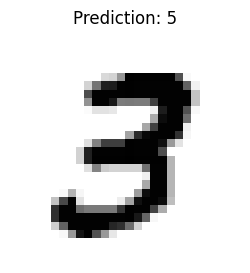

In [ ]:
SAMPLE_INDEX = 7
label_digit = y_train[SAMPLE_INDEX]
sample_digit = x_train[SAMPLE_INDEX,::]
sample_digit = sample_digit[np.newaxis,::]

predicted_digit = np.argmax(tf_cnn_model.predict(sample_digit), axis=1).item()

_, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.set_axis_off()
image = sample_digit.squeeze()
ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
ax.set_title(f"Prediction: {predicted_digit}")

# END - Helper Code Below


### Showing digits and the model's predicted label

In [ ]:
# Predict the value of the digit on the test subset (X_test is an array)
predicted = clf.predict(X_test)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted): #X_test contains the new images for prediction
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

### Showing Confusion Matrix


In [ ]:
 # y_test is an array containing the correct labels, predicted is an array containing the model's prediction
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# End